<div class="alert alert-block alert-success"><h3>IFN619 - Data Analytics for Information Professionals</h4></div>

## Workshop 02 :: Decision Analysis / Case Studies in Data Analytics

1. Motivation Example
2. The Data Analytics Process
3. Extracting Value out of Data
4. How to analyse a case study



### [1] Motivation: the Analytics Process and Decision Analysis

You have been hired to be the data analyst of the company *Hesiod*, which analyses real estate indicators of different countries. 

Marcel, the CEO of the company, provides you some datasets with financial and economic indicators and asks your opinion about what to expect in the next couple of years in the housing market. Can you help Marcel?

### The Analytics Process

<img src="images/Data Analytics Decision Process.png" />




### Collecting / Loading Data

We will use Python **as a tool** to help us gain some insight about the data and to help us to **answer our business concern**.

The dataset that you need to analyse is in the folder 'data/House_Price_Index_2003_2018.csv'

You can load the data into Python in the following way

In [2]:
# import the required Python libraries to process the data:
import pandas as pd                # used for data manipulation and data analysis
import matplotlib.pyplot as plt    # used for visualisation

# specify the location and the filenae of your dataset
file_path = 'data/House_Price_Index_2003_2018_v2.csv'   

# load the .csv dataset using the function read_csv, which is part of the pandas library
data = pd.read_csv(file_path)

# We can already have some general information about our dataset by getting 
# the number of rows and columns of the data. For this, we use the *shape* method from Python:
dimensions = data.shape

print( 'General size of the dataset: ' + str( dimensions ))

# and we can extract the number of rows and the number of columns by doing:
num_rows = dimensions[0] # 1st component of the variable dimensions
num_col  = dimensions[1] # 2nd component of the variable dimensions

print('The dataset has ' + str( num_rows ) + ' rows and ' + str( num_col ) + ' columns!' )


General size of the dataset: (62, 17)
The dataset has 62 rows and 17 columns!


We can also display the data so we can see what we are dealing with:

In [3]:
# we can print the dataset just to check what it contains
print(  data )

    Date Quarter  Sweden   Spain  Portugal  Norway   Italy  Ireland  Iceland  \
0   2003      Q1   62.27     NaN       NaN   67.16   88.16      NaN    92.12   
1   2003      Q2   63.60     NaN       NaN   68.75   88.70      NaN    93.83   
2   2003      Q3   65.22     NaN       NaN   68.88   89.88      NaN    98.48   
3   2003      Q4   65.53     NaN       NaN   69.44   90.03      NaN    97.98   
4   2004      Q1   67.02     NaN       NaN   74.40   90.44      NaN    97.85   
5   2004      Q2   69.49     NaN       NaN   75.16   91.58      NaN   101.95   
6   2004      Q3   71.22     NaN       NaN   75.34   93.57      NaN   103.76   
7   2004      Q4   71.77     NaN       NaN   75.83   94.81      NaN   107.13   
8   2005      Q1   72.42     NaN       NaN   79.00   96.13   129.43   116.34   
9   2005      Q2   74.50     NaN       NaN   80.33   97.23   130.53   127.36   
10  2005      Q3   77.39     NaN       NaN   80.90   98.54   134.46   133.17   
11  2005      Q4   78.99  101.54       N

**QUESTION:** 
- What do the **rows** and **columns** of this dataset **represent**?


**ANSWER**
- **Rows** represent the **house price index** for each **quarter (date)**.
- **Columns** represent the **house price index** for each **country**

### Clean / PreProcess

We will leavet this step to be exploored in more detail in the next workshop. However, we can still make some interesting questions about this data:

- Q1: What is this dataset about?
- Q2: What are the main problems with this dataset? 
- Q3: Is the data relevant to our initial question (our Business concern)?

**ANSWER:** (Group activity)
- Q1: This dataset contains the house price indexes of several countries around the world from 2003 - 2018
- Q2: The dataset has missing values, which will limit our analysis
- Q3: Yes, the data is relevant because house price indexes are an important indicator of the real estate narket, although some additional indicators could be helpful to enrich the dataset

### Perform Analysis

This dataset describes the **house indexes of different countries in the world**. 

Remeber our question: *what to expect in the next couple of years in the housing market?*

This is a vague question that requires you to **explore** the dataset to get some *insights* about the data.

We can start this process by asking questions:

**Question:** Which countries are in our dataset?

In [4]:
# the method '.columns' extracts a list with the headings of your dataset
headings = data.columns

for head in headings:   # for each column in the list of columns
    print( head )       # print the data
    

Date
Quarter
Sweden
Spain
Portugal
Norway
Italy
Ireland
Iceland
Greece
Germany
United Kingdom
France
Netherlands
Australia
United States of America
Finland


Maybe we can clean this more...

In [5]:
# selects data from the 2nd position of the list, until the end
countries = headings[2:]
print("We have a total of " + str(len(countries)) + ". The countries that are covered in this dataset are:")
for country in countries:   
    print( country )      
    

We have a totoal of 15. The countries that are covered in this dataset are:
Sweden
Spain
Portugal
Norway
Italy
Ireland
Iceland
Greece
Germany
United Kingdom
France
Netherlands
Australia
United States of America
Finland


**Question:** For how many years has this information been collected?

In [6]:
# instead of using the 'posiiton' of the data, we can extract it by its column name through
# the method .loc[]
all_dates = data.loc[:, "Date"]

print( all_dates )

0     2003
1     2003
2     2003
3     2003
4     2004
5     2004
6     2004
7     2004
8     2005
9     2005
10    2005
11    2005
12    2006
13    2006
14    2006
15    2006
16    2007
17    2007
18    2007
19    2007
20    2008
21    2008
22    2008
23    2008
24    2009
25    2009
26    2009
27    2009
28    2010
29    2010
      ... 
32    2011
33    2011
34    2011
35    2011
36    2012
37    2012
38    2012
39    2012
40    2013
41    2013
42    2013
43    2013
44    2014
45    2014
46    2014
47    2014
48    2015
49    2015
50    2015
51    2015
52    2016
53    2016
54    2016
55    2016
56    2017
57    2017
58    2017
59    2017
60    2018
61    2018
Name: Date, Length: 62, dtype: int64


We can also clean this more by taking out repeated entries

In [7]:
# the function unique() removes duplicated entries from the data
dates = all_dates.unique()
print( dates )

print("This dataset describes house price from: " + str(min(dates)) + " to " + str(max(dates)))

[2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016
 2017 2018]
This dataset describes house price from: 2003 to 2018


**QUESTION:** For how many years has this information been collected?

**ANSWER?**
- This information has been collected from 2003 to 2018 every quarter

### Visualization

We can try to visualize our data to get some more insights. We can plot the house price indexes of Australia from 2003 to 2018. But for that... we need to process data again...

We need to eliminate the *Quarter* dimension of our data by grouping the data by Date (which represents the year). This is performed by making the **average** of the **house price indexes** of each **country** for **ALL QUARTERS** and **aggregating** the results **by year**. In Python, one can do this using the function *.groupby and the aggregation of the data is done by computing the **mean**.
The following figure shows an example.

<img src='images/groupBy.png' />


In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Group data records from Australia and UK by DATE in order to have data in the format:
# 2003 price_2003
# 2004 price_2004 ...
# This way, we are removing the Quarter column from our representation
AU_house_price_indx = data.groupby('Date')['Australia'].mean()
UK_house_price_indx = data.groupby('Date')['United Kingdom'].mean()

# Compute the overall average of the house prices in Australia and in UK
AU_house_price_indx_avg = data['Australia'].mean()
print( 'The avarage house price index in Australia is ' + str(round(AU_house_price_indx_avg,4)) )

# Compute the average of house prices for UK and represent the results as a list
UK_house_price_indx_avg = data['United Kingdom'].mean()
print( 'The avarage house price index in United Kingdom is ' + str(round(UK_house_price_indx_avg,4)) )

# Convert to a format where you will have the average house price as a list
# We need this for plotting reasons
lst = np.ones(num_col - 1, float)
AU_house_price_indx_avg = np.round( data['Australia'].mean(), 4)*lst
UK_house_price_indx_avg = np.round( data['United Kingdom'].mean(), 4)*lst




The avarage house price index in Australia is 97.0148
The avarage house price index in United Kingdom is 102.9131


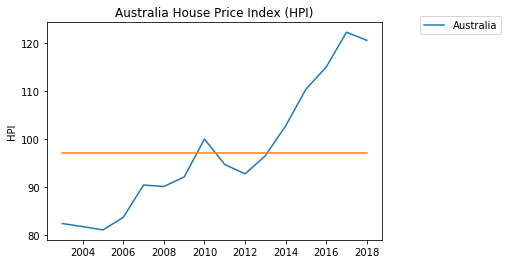

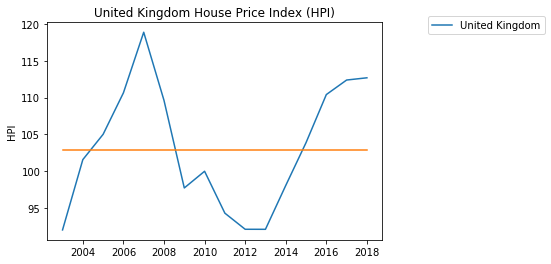

In [9]:
plt.plot( AU_house_price_indx, label='Australia')   # House prices per year in AU
plt.plot( dates, AU_house_price_indx_avg )          # Overall average of house price indx in AU
plt.ylabel('HPI')
plt.title('Australia House Price Index (HPI)')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

plt.plot(UK_house_price_indx, label='United Kingdom')  # House prices per year in UK
plt.plot(dates, UK_house_price_indx_avg)               # Overall average of house price indx in UK
plt.ylabel('HPI')
plt.title('United Kingdom House Price Index (HPI)')
plt.legend(bbox_to_anchor=(1.5, 1.05))
plt.show()

**Question** Are there similarities between the house price indexes in UK with Australia?

**ANSWER**

Yes. Both countries seem to display some patterns:
- the house price indexes on both countries tend to mimic after 2010. It seems there is a strong positve correlation between them. 
- before 2010, we can see small flutuations of the house price indexes in Australia. Although these flutuations tended to increase, this increase has been bellow the current expected value (average) of the house price indexes

Looking at these two graphs separately turns the analysis difficult. It would be helpful to put them on the same figure in order to make a comparison

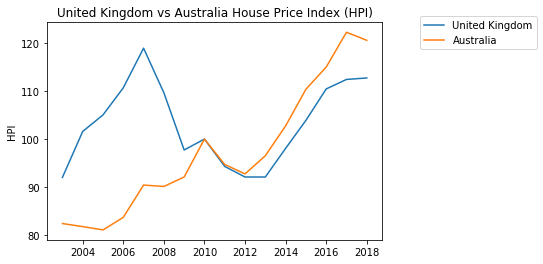

In [13]:
# visualize data
plt.plot(UK_house_price_indx)
plt.plot(AU_house_price_indx)
plt.ylabel('HPI')
plt.title('United Kingdom vs Australia House Price Index (HPI)')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

In [14]:
#Select UK house price indexes from 2003 - 2010
UK_house_price_03_10 = UK_house_price_indx[0:8] 
#Select UK house price indexes from 2003 - 2010
UK_house_price_08_18 = UK_house_price_indx[6:]  

#Select AU house price indexes from 2003 - 2010
AU_house_price_03_10 = AU_house_price_indx[0:8]  
#Select AU house price indexes from 2008 - 2018
AU_house_price_08_18 = AU_house_price_indx[6:] 


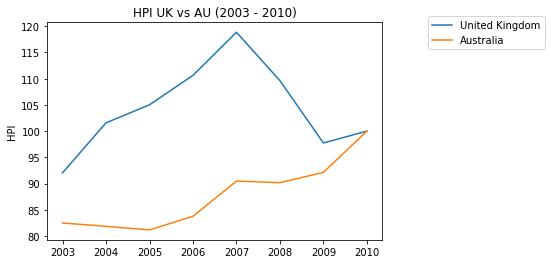

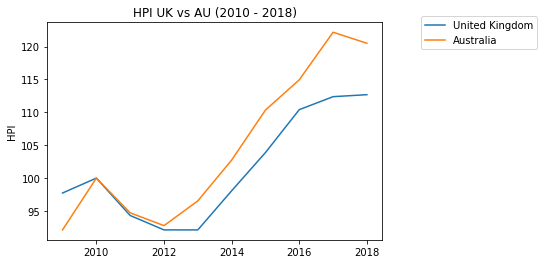

In [16]:
# visualize data
plt.plot(UK_house_price_03_10)
plt.plot(AU_house_price_03_10)
plt.ylabel('HPI')
plt.title('HPI UK vs AU (2003 - 2010)')
plt.legend(bbox_to_anchor=(1.5, 1.05))
plt.show()

plt.plot(UK_house_price_08_18)
plt.plot(AU_house_price_08_18)
plt.ylabel('HPI')
plt.title('HPI UK vs AU (2010 - 2018)')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

**Group Activity**
- Q1: Can you explain the exponential growth of house prices in UK between 2003 - 2007?
- Q2: Why house prices started to drop in UK between 2007 - 2014?
- Q3: What happened to the housing sector in Australia
    - Q3.1. Before 2007:
    - Q3.2. Between 2007 - 2010
    - Q3.3. Between 2010 - 2013
    - Q3.4. After 2014


**OUTCOME OF GROUP ACTIVITY**
- Q1:the increase in house prices was due to a set of reasons. The most impostant ones were the following:
 1. interest rates were low. 
 2. Banks looked at the housing sector as a safe investment since it has been increasing since the 90's.
 3. Under this premise, banks provided loans to people to buy houses, even to people with poor credit history. Even if a person could not pay back its mortgage, banks could takethe house back and put it back in the market for a higher price. These investments created a boom in the housing section and are the main reason of why the figure shows this exponential peak in UK
 
- Q2: In 2007, interest rates started to increase, which put a bigger burden in those who had difficulties paying back their mortgage. Also, the house prices reached such a peak in price that people were no longer willing to buy a house. This factors, among others, Ttogether with forces of supply and demand, made house prices to drop. 

- Q3:
    - Q3.1. The house market sector in Austraia before 2007 was statble. Small house price index fluctuations between 80 and 90. 
    - Q3.2. Again, not much volatility in the housing sector although the house price index started to slowly increae from 90 - 95.
    - Q3.3. The house price index started to decrease as a consequence in gdp due to the recessions that was affecting many countries worldwide.
    - Q3.4. From 2014, we can see a similar pattern to what happened to UK before the 2007 crash. House price index in Australia has been increasing exponentialy and from 2018 we are witnessing a drop. This suggests that a bubble might be affecting the housing market in Australia with serious social - economic consequences of it bursts. 

### Try it yourself! Goup Activity###

It is interesting to analyse the housing market in different sets of countries: 
- Southern European countries: Portugal, Spain, Italy, Greece
- Northen European countries: Sweden, Finland, Norway 
- Major European powers: Germany, France, UK
- USA vs UK

Plot three graphs, showing these three sets of contries in different plots. Interpret the data.

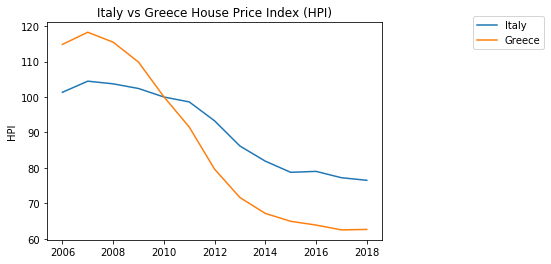

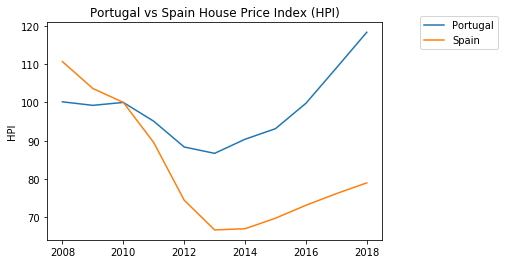

In [17]:
# SOUTHERN EUROPE ANALYSIS

# Group data by year | country
group_col = 'Date'
PT_house_price_indx = data.groupby(group_col)['Portugal'].mean()  # Portugal
SP_house_price_indx = data.groupby(group_col)['Spain'].mean()  # Spain
IT_house_price_indx = data.groupby(group_col)['Italy'].mean()  # Italy
GR_house_price_indx = data.groupby(group_col)['Greece'].mean()  # Greece

# Plot results
plt.plot(IT_house_price_indx[3:])
plt.plot(GR_house_price_indx)
plt.legend(bbox_to_anchor=(1.5, 1.05))
plt.ylabel('HPI')
plt.title('Italy vs Greece House Price Index (HPI)')
plt.show()

plt.plot(PT_house_price_indx)
plt.plot(SP_house_price_indx[5:])
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.ylabel('HPI')
plt.title('Portugal vs Spain House Price Index (HPI)')
plt.show()


### Insert here your interpretations of the graphs
1. Italy and Greece seem to be two countries in which the housing market evolved in similar ways. One can also see that the housing bubble was more intense on Greece rather than Spain. In both countries, the housing sectior seem to not have recovered since the last recession

2. The same anaysis can be made for Portugal and Spain. The housing market seems to e positvely correlated in both countries. In Sapin, one can see that impacts of the crisis were more severe, because Spain had a big construction industry sector. When there was the recession, the unemplyment rates grew up exponentially, leaving the country in a severe crisis. In both countries, the housing market contnues to grow, although in Spain this growth is very contained (probably because of other economical and socail effects of the crisis)


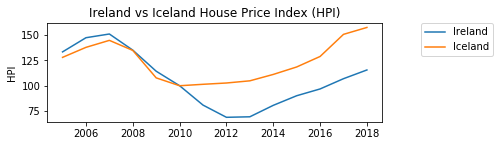

In [18]:
# The Case of Ireland and Iceland

# Group data by year | country
group_col = 'Date'
IR_house_price_indx = data.groupby(group_col)['Ireland'].mean()  # Ireland
IC_house_price_indx = data.groupby(group_col)['Iceland'].mean()  # Iceland

# Plot results
plt.subplot(2, 1, 2)
plt.plot(IR_house_price_indx)
plt.plot(IC_house_price_indx[2:])
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.ylabel('HPI')
plt.title('Ireland vs Iceland House Price Index (HPI)')
plt.show()



### Insert here your interpretations of the graphs
1. Ireland and Iceland seem to be two countries in which the housing market evolved in similar ways. One can also see that the housing bubble was more intense on Ireland rather than Iceland. In both countries, the housing sectior seem to not have recovered since the last recession
2. Iceland took measures to criminaly punish bankers that were involved in very risky investments. 


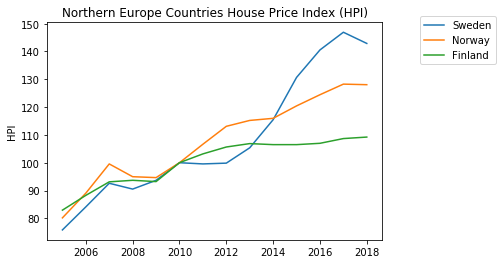

In [20]:
# NORTHERN EUROPE ANALYSIS

# Group data by year | country
group_col = 'Date'
SW_house_price_indx = data.groupby(group_col)['Sweden'].mean()   # Sweden
NOR_house_price_indx = data.groupby(group_col)['Norway'].mean()  # Norway
FIN_house_price_indx = data.groupby(group_col)['Finland'].mean()  # Finland

# Plot results
plt.plot(SW_house_price_indx[2:])
plt.plot(NOR_house_price_indx[2:])
plt.plot(FIN_house_price_indx)
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.ylabel('HPI')
plt.title('Northern Europe Countries House Price Index (HPI)')
plt.show()

### Insert here your interpretations of the graphs
1. The evolution of the housing sector in the three countries seem to be positively and strongly correlated. These countries share lots of regulations and laws and have a similar culture so this is an expected result
2. In Sweden, however, the housing market seems to be heading towards a bubble. Maybe due to an increase in investments in the  housing market

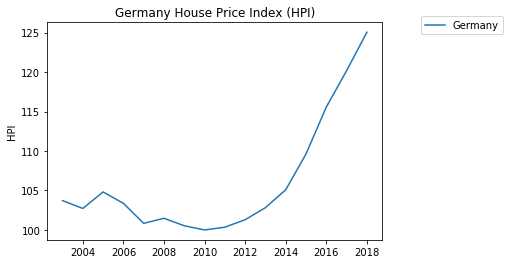

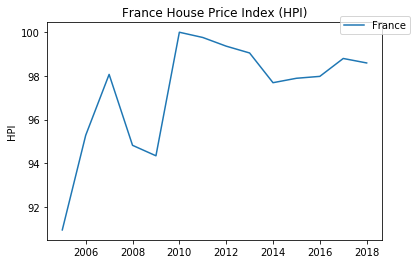

In [22]:
# MAIN EUROPE POWERS ANALYSIS

# Group data by year | country
group_col = 'Date'
GE_house_price_indx = data.groupby(group_col)['Germany'].mean()   # Germany
FR_house_price_indx = data.groupby(group_col)['France'].mean()   # France

# Plot results
plt.plot(GE_house_price_indx)
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.ylabel('HPI')
plt.title('Germany House Price Index (HPI)')
plt.show()

# Plot results
plt.plot(FR_house_price_indx)
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.ylabel('HPI')
plt.title('France House Price Index (HPI)')
plt.show()

### Insert here your interpretations of the graphs
1. Germany did not suffer a crisis in the housing sector back in 2007. However, it is tending to one. One exaplanation could be that, since Germany was one of the most economically stable countries in EU, then it received a big wave of emmigration. Forces of supply and demand simply made the housing sector more competitor in the biggest cities.
2. France managed to regularize its housing sector. Volaatility is low since 2014


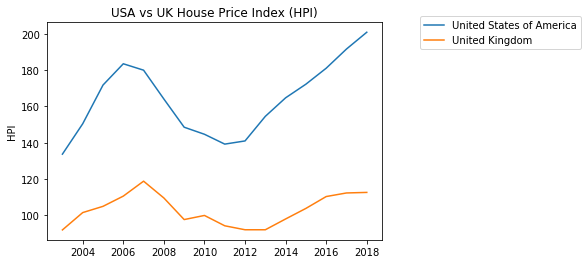

In [45]:
# Group data by year | country
USA_house_price_indx = data.groupby('Date')['United States of America'].mean()   # United States of America

# Plot results
plt.plot(USA_house_price_indx)         # USA
plt.plot(UK_house_price_indx)          # UK
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.ylabel('HPI')
plt.title('USA vs UK House Price Index (HPI)')
plt.show()


Maybe it would be more interesting to plot these graphs with their different scales

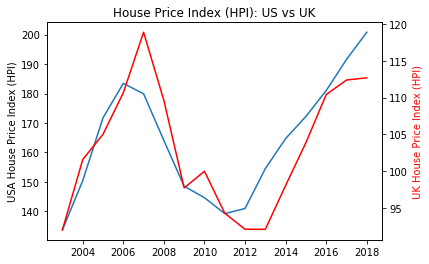

In [49]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(USA_house_price_indx)
ax1.set_ylabel('USA House Price Index (HPI)')

ax2 = ax1.twinx()
ax2.plot(UK_house_price_indx, 'r-')
ax2.set_ylabel('UK House Price Index (HPI)', color='r')

plt.title('House Price Index (HPI): US vs UK')
plt.show()

### Insert here your interpretations of the graphs
1. The house price index evolved in a similar way for both countries. In fact, they are trogly and positively correlated with each other.
2. US experienced a bigger house market boom than UK. This is normal, since US has a higher economical and financial situation than Uk. 
3. UK's housing sector stagnated compared to US. This can be due to the impact of the uncertainties of Brexit in the economy

### Final Discussion ###
What do you think it will happen in the next couple of years in the housing sector? What is the trend in Australia? Is there a pattern from past data when we compare with other countries?

I guess this article from the Economist, published a couple of days after our workhop pretty much summarizes the situation:


In [53]:
from IPython.display import IFrame

IFrame(src='https://www.economist.com/finance-and-economics/2019/03/09/prices-of-prime-properties-around-the-world-are-falling', width=700, height=600)


### The Impact of Interest Rates

In this section, we present you how you can plot data with different ranges in a single graph so we can interprete da data and compare it.

We will anayse the relationship between house prices and interest rates in UK and Australia

In [26]:
# specify the location and the filenae of your dataset
file_path = 'data/interest_rates.csv'   

# load the .csv dataset using the function read_csv, which is part of the pandas library
int_rates = pd.read_csv(file_path)

# We can already have some general information about our dataset by getting 
# the number of rows and columns of the data. For this, we use the *shape* method from Python:
dimensions = data.shape

print( 'General size of the dataset: ' + str( dimensions ))

# and we can extract the number of rows and the number of columns by doing:
num_rows = dimensions[0] # 1st component of the variable dimensions
num_col  = dimensions[1] # 2nd component of the variable dimensions

print('The dataset has ' + str( num_rows ) + ' rows and ' + str( num_col ) + ' columns!' )


General size of the dataset: (62, 17)
The dataset has 62 rows and 17 columns!


In [27]:
int_rates

Date Quarter  United Kingdom  Australia  Finaland    France   Germany  \
0   2003      Q1        4.309100   5.238139  4.136667  4.111395  4.043333   
1   2003      Q2        4.266233   5.058995  3.946667  3.936032  3.863333   
2   2003      Q3        4.575000   5.423276  4.130000  4.133706  4.090000   
3   2003      Q4        4.956033   5.746692  4.326667  4.342419  4.286667   
4   2004      Q1        4.767300   5.578812  4.063333  4.105894  4.063333   
5   2004      Q2        5.089600   5.868857  4.276667  4.306586  4.220000   
6   2004      Q3        5.008767   5.570985  4.236667  4.158909  4.113333   
7   2004      Q4        4.663400   5.344444  3.860000  3.825275  3.750000   
8   2005      Q1        4.642100   5.467404  3.630000  3.641921  3.600000   
9   2005      Q2        4.441267   5.300068  3.333333  3.373739  3.303333   
10  2005      Q3        4.278967   5.198432  3.143333  3.233508  3.166667   
11  2005      Q4        4.293233   5.393988  3.296667  3.388559  3.343333   
12  2006      Q1        4.182400   5.272268  3.446667  3.512511  3.476667   
13  2006      Q2        4.610333   5.689188  3.946667  3.987011  3.936667   
14  2006      Q3        4.620567   5.736325  3.933333  3.897366  3.880000   
15  2006      Q4        4.593400   5.653708  3.803333  3.786043  3.756667   
16  2007      Q1        4.861600   5.807896  4.036667  4.054051  4.003333   
17  2007      Q2        5.207267   6.011781  4.383333  4.387915  4.330000   
18  2007      Q3        5.183700   6.022596  4.440000  4.442817  4.340000   
19  2007      Q4        4.792533   6.135811  4.313333  4.328017  4.193333   
20  2008      Q1        4.520300   6.152160  4.066667  4.082848  3.926667   
21  2008      Q2        4.907267   6.370742  4.490000  4.469827  4.253333   
22  2008      Q3        4.782067   5.958310  4.556667  4.484654  4.260000   
23  2008      Q4        4.153267   4.790564  4.046667  3.899922  3.496667   
24  2009      Q1        3.536500   4.222159  3.870000  3.642386  3.073333   
25  2009      Q2        3.583300   5.024317  3.890000  3.787752  3.323333   
26  2009      Q3        3.731533   5.448237  3.673333  3.635720  3.303333   
27  2009      Q4        3.738733   5.463333  3.520000  3.529372  3.190000   
28  2010      Q1        4.052133   5.551667  3.376667  3.483714  3.176667   
29  2010      Q2        3.826200   5.534167  3.103333  3.183500  2.776667   
..   ...     ...             ...        ...       ...       ...       ...   
34  2011      Q3        2.867000   4.571667  2.730000  3.009407  2.260000   
35  2011      Q4        2.334500   4.092500  2.523333  3.186324  1.933333   
36  2012      Q1        2.217500   3.971667  2.306667  3.049875  1.833333   
37  2012      Q2        1.974367   3.376667  1.910000  2.771583  1.420000   
38  2012      Q3        1.682667   3.055833  1.636667  2.210610  1.356667   
39  2012      Q4        1.797633   3.112500  1.680000  2.111908  1.370000   
40  2013      Q1        2.078133   3.469167  1.720000  2.160253  1.466667   
41  2013      Q2        2.011633   3.336667  1.663333  1.962097  1.340000   
42  2013      Q3        2.674700   3.870000  2.056667  2.364977  1.726667   
43  2013      Q4        2.794667   4.113333  2.003333  2.330033  1.746667   
44  2014      Q1        2.836133   4.133333  1.936667  2.262915  1.610000   
45  2014      Q2        2.741600   3.836667  1.700000  1.858657  1.350000   
46  2014      Q3        2.586967   3.476667  1.223333  1.438733  0.993333   
47  2014      Q4        2.111633   3.180000  0.933333  1.105452  0.700000   
48  2015      Q1        1.706533   2.540000  0.496667  0.593410  0.306667   
49  2015      Q2        1.982967   2.756667  0.663333  0.839791  0.490000   
50  2015      Q3        1.998867   2.773333  0.906667  1.041099  0.656667   
51  2015      Q4        1.915767   2.773333  0.826667  0.893190  0.530000   
52  2016      Q1        1.609967   2.593333  0.613333  0.648156  0.256667   
53  2016      Q2        1.471967   2.320000  0.413333  0.471207  0.080000   


### Visualising Data

As you have noticed, the house price index usually varies between 100 - 140. When we take into consideration interest rates, these values usually vary between 0% and 15%. If we plot these figures in one single graph , you wll notice that the data will be skewed because it will be affected by the scalling of the house prices. So, we would not be able to analyse the data correctly:

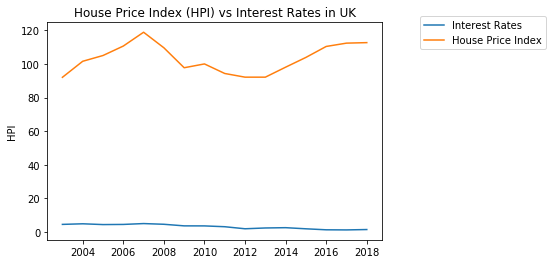

In [33]:
UK_int_rates = int_rates.groupby('Date')['United Kingdom'].mean()

plt.plot(UK_int_rates, label='Interest Rates') 
plt.plot(UK_house_price_indx, label='House Price Index')          
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.ylabel('HPI')
plt.title('House Price Index (HPI) vs Interest Rates in UK')
plt.show()

One way to avoid this is to plot the data with two different y-axis. This way, we are to see the data represented in its own scale. This will allow us a more clear interpretation of how data moves throughout time and how to interpret it.

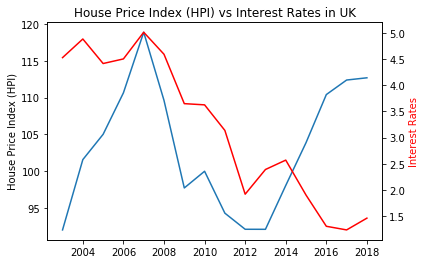

In [34]:
# interest_rates in UK
UK_int_rates = int_rates.groupby('Date')['United Kingdom'].mean()

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(UK_house_price_indx)
ax1.set_ylabel('House Price Index (HPI)')

ax2 = ax1.twinx()
ax2.plot(UK_int_rates, 'r-')
ax2.set_ylabel('Interest Rates', color='r')

plt.title('House Price Index (HPI) vs Interest Rates in UK')
plt.show()


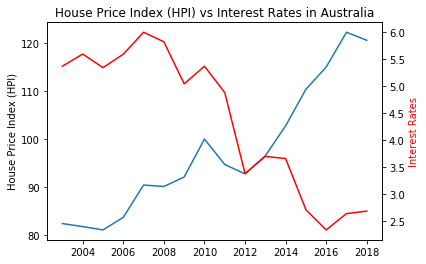

In [30]:
# interest_rates in AU
AU_int_rates = int_rates.groupby('Date')['Australia'].mean()

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(AU_house_price_indx)
ax1.set_ylabel('House Price Index (HPI)')

# plots the data according to another axis
ax2 = ax1.twinx()
ax2.plot(AU_int_rates, 'r-')
ax2.set_ylabel('Interest Rates', color='r')
plt.title('House Price Index (HPI) vs Interest Rates in Australia')
plt.show()

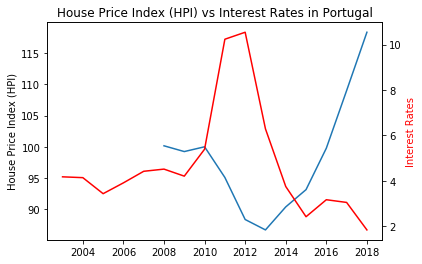

In [31]:
# interest_rates in a general country
country = 'Portugal'
ctr_int_rates = int_rates.groupby('Date')[country].mean()
ctr_house_price_indx = data.groupby('Date')[country].mean()

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(ctr_house_price_indx)
ax1.set_ylabel('House Price Index (HPI)')

ax2 = ax1.twinx()
ax2.plot(ctr_int_rates, 'r-')
ax2.set_ylabel('Interest Rates', color='r')
plt.title('House Price Index (HPI) vs Interest Rates in ' + country)
plt.show()